The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15 minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them

In [356]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import seaborn as sns

In [320]:
#load file
df = pd.read_json('logins.json')

In [321]:
#check head
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [322]:
df.isnull().any()

login_time    False
dtype: bool

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [334]:
# set 15minute time intervals
df['minsrange'] = df['login_time'].dt.floor('15T')
da = df['minsrange'].reset_index()
da.head()

,index,minsrange
0,0,1970-01-01 20:00:00
1,1,1970-01-01 20:15:00
2,2,1970-01-01 20:15:00
3,3,1970-01-01 20:15:00
4,4,1970-01-01 20:15:00


In [335]:
# Aggregate these login counts based on 15minute time intervals
da['count'] = da.groupby('minsrange')['minsrange'].transform('count')
da.head()

,index,minsrange,count
0,0,1970-01-01 20:00:00,2
1,1,1970-01-01 20:15:00,6
2,2,1970-01-01 20:15:00,6
3,3,1970-01-01 20:15:00,6
4,4,1970-01-01 20:15:00,6


In [344]:
#unique date time and counts columns
dz = da.groupby('minsrange')['count'].size().reset_index()
dz

,minsrange,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1
...,...,...
9376,1970-04-13 17:45:00,5
9377,1970-04-13 18:00:00,5
9378,1970-04-13 18:15:00,2
9379,1970-04-13 18:30:00,7


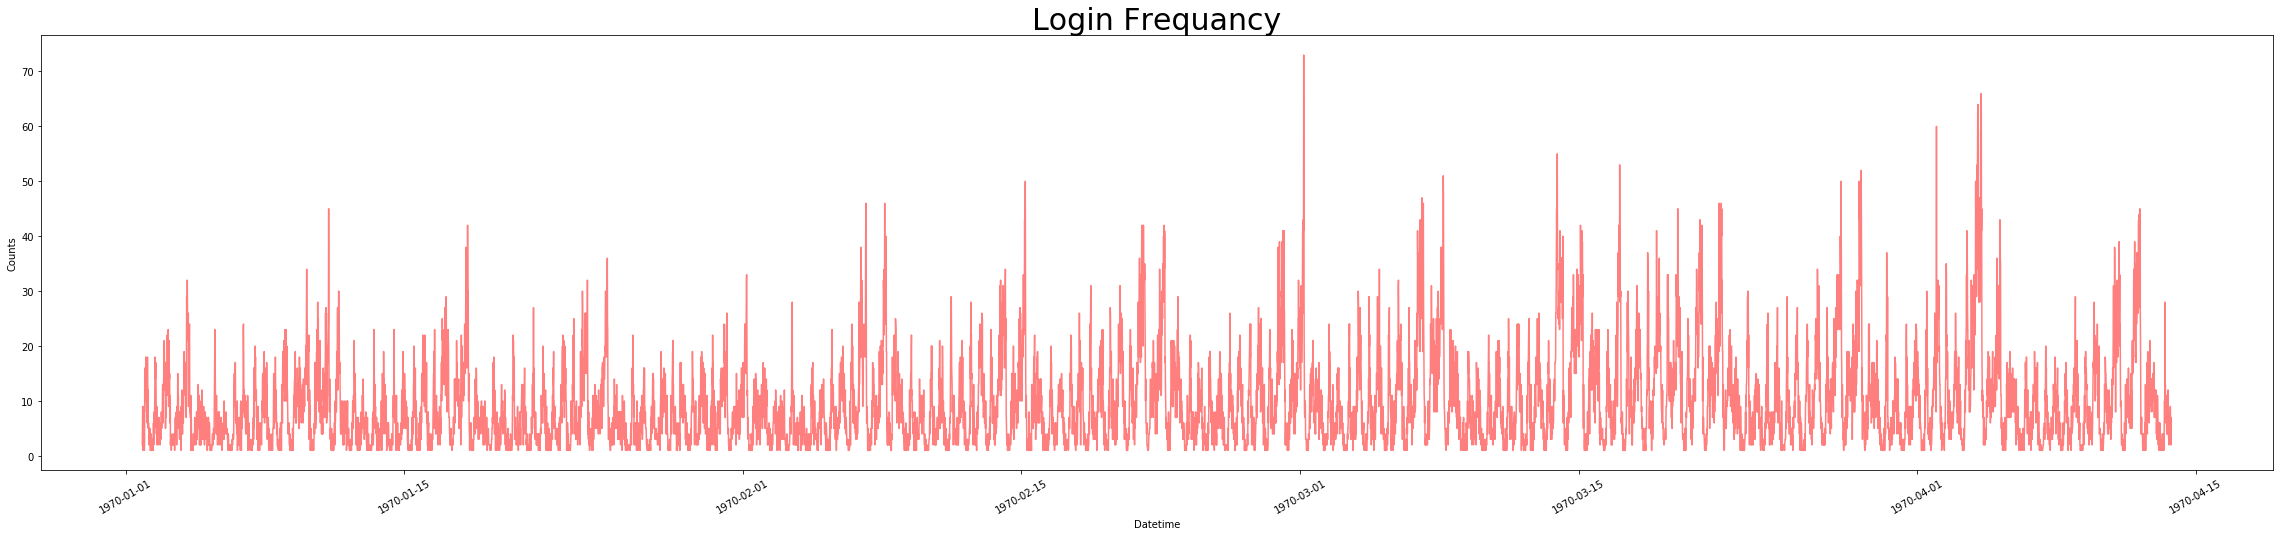

In [367]:
#visualize login date time
ax, fig = plt.subplots(figsize = (40,8))

plt.plot(dz['minsrange'], dz['count'],color = 'r', alpha = 0.5)
plt.xticks(rotation ='30')
plt.title('Login Frequancy', size = 30)
plt.xlabel('Datetime')
plt.ylabel('Counts')
plt.show()

The count from January 1 to April 15 is comparable. March 1st was the highest number, after this date the trend began to rise slightly.

### Login count by time of the day

#### I will merge the date and time into one day to check the frequency of logins during the day.

In [380]:
#Count time based on time
dz_time = dz[['minsrange', 'count']]
dz_time['minsrange'] = dz_time['minsrange'].dt.strftime("%H:%M:%S")
dz_time = dz_time.groupby('minsrange')['count'].sum().reset_index()
dz_time

,minsrange,count
0,00:00:00,1439
1,00:15:00,1547
2,00:30:00,1525
3,00:45:00,1482
4,01:00:00,1549
...,...,...
91,22:45:00,1637
92,23:00:00,1573
93,23:15:00,1552
94,23:30:00,1456


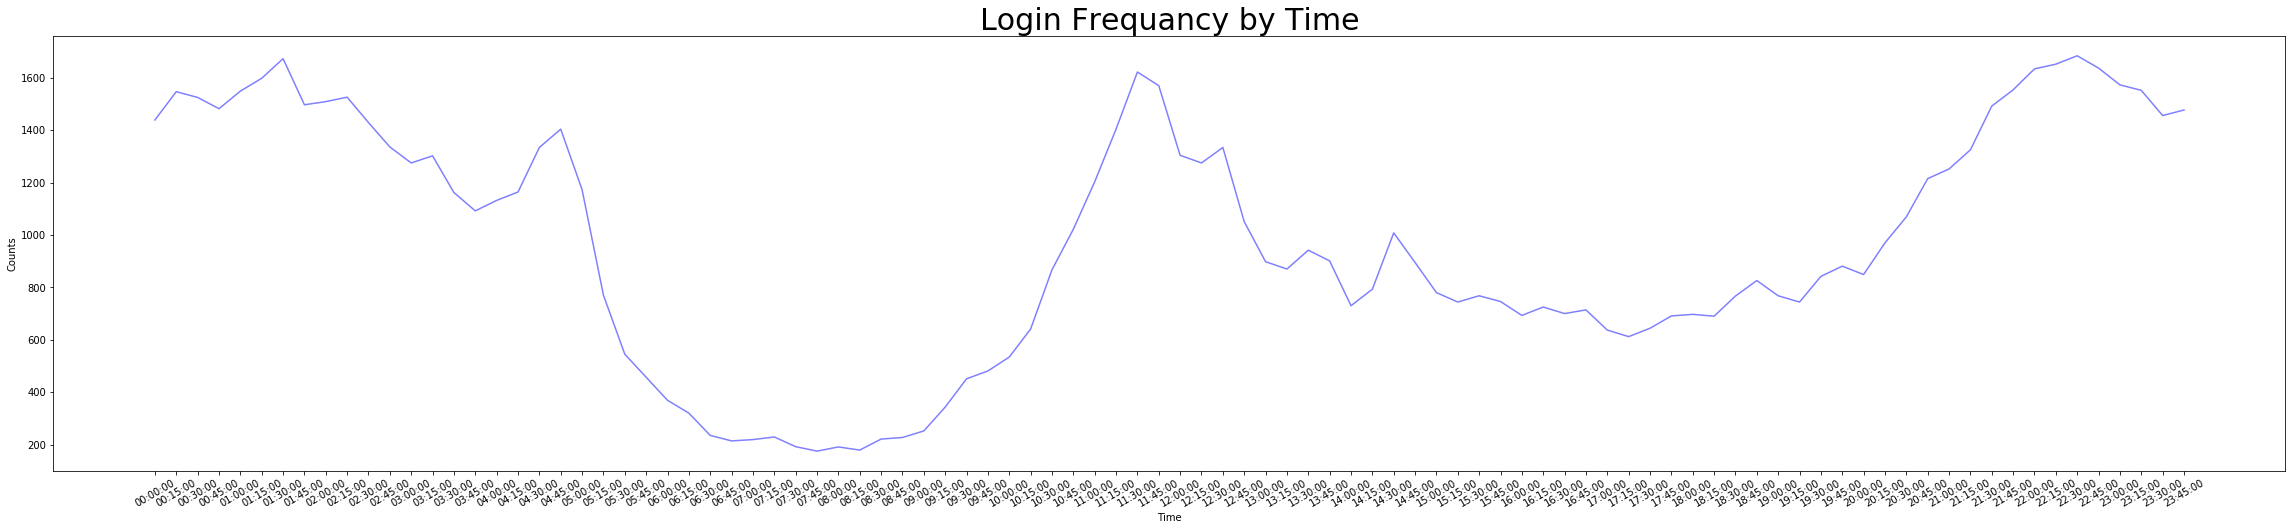

In [381]:
#visualize login time
ax, fig = plt.subplots(figsize = (40,8))

plt.plot(dz_time['minsrange'], dz_time['count'],color = 'b', alpha = 0.5)
plt.xticks(rotation ='30')
plt.title('Login Frequancy by Time', size = 30)
plt.xlabel('Time')
plt.ylabel('Counts')
plt.show()

The login number from 6 am to 9 am as the lowest count time, and from 12 pm to 19 am is the second lowest time. Other than that, the number of other logins is relatively average.
In the morning, the number of logins is the least. This time period is when most people are still at home and ready to go to work, or those whose nightlife has ended have gone home to rest. The peak hours at noon can be considered to be caused by eating out. From 12:30 in the afternoon to around 18:00 is the second lower time, which is also the working time. The peak time from get off work after 18:00 to 4:30 in the morning shows that the city’s nightlife is very active.

Therefore, we will know that the nighttime work of text driver in the city is busier than the daytime work.